In [1]:
from sympy import *
import sympy as sp
from sympy import Point, Circle, Eq
from sympy.abc import x, y, a, b
from sympy import symbols, Eq, latex
from IPython.display import display, Math  
from sympy.plotting import plot
import numpy as np
from numpy import random
import scipy 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Ejercicio 8

### Singular Value Decomposition (SVD)- Descomposición de valores singulares (DVS)

Dada $A \in \mathbb{K}^{m\times n}$ , existe una descomposición DVS de $A$ : 
$$
\huge A = U \Sigma V^*
$$
donde $U\in \mathbb{K}^{m\times m}$ y $V\in \mathbb{K}^{n \times n}$ son unitarias, $\Sigma \in \mathbb{R}^{n \times m}$  diagonal.

$\Sigma $ tiene la forma :

- si $m \geq n$ : $ \Sigma = \begin{pmatrix} D \\ O_{(m-n) \times n}\end{pmatrix}$,
  
- si $m < n$ : $ \Sigma = \begin{pmatrix} D && O_{m \times (n-m)}\end{pmatrix}$

con $D \in \mathbb{R}^{p \times p}$ donde $p = min\{m,n\}$ diagonal con $d_{11} \geq d_{22} \geq ... \geq d_{pp} \geq 0 $. Los elementos *no nulos* de la diagonal de $D$ se denominan **valores singulares de $A$**, y se denotan $\sigma_i(A)= d_{ii}$

#### Construcción de la DVS

1) Construimos $V$ tomando como columnas una base ortonormal de autovectores de $A^*A \in \mathbb{K}^{n\times n}$.
2) Calcular los valores singulares $\sigma_i = \sqrt{\lambda_i}$ con $\lambda_i$ los autovalores de $A^*A$ ($\lambda_i \geq 0 $ pues $A^*A$ es una matriz hermitiana semi-definida positiva).
3) Calcular las columnas de $U$ mediante la relación $u_i= \frac{1}{\sigma_i}Av_i$.
4) Elegir las columnas de $U$ faltantes completando a una base ortonormal de $\mathbb{K}^m$.

#### a)

In [5]:
A = Matrix([[1, -2, 2], [-1,2,-2]])
lamda = symbols('lamda')

#---Construcción de V
M = A.T * A 
p = M.charpoly(lamda) #Polinomio característico
factor(p.as_expr()) #Factorizamos el característico

avecs = M.eigenvects() #Obtenemos los autovectores de A*A
avecs = [avecs[1][2][0], avecs[0][2][0], avecs[0][2][1] ] #Listamos los autovectores en orden decreciente de autovalores
bon = GramSchmidt(avecs, orthonormal=True) #Usamos GramSchmidt para ortonormalizar la base de autovectores de A*A
V = bon[0].row_join(bon[1]).row_join(bon[2]) #Construimos la matriz V usando como columnas los vectores de la bon, en orden

#---Obtención de los valores singulares y construcción de Sigma
avals = M.eigenvals() #Nos da un diccionario de clave aval y significado multiplicidad

m, n = A.shape
S = zeros(m,n)

valores_singulares = []
for aval, mult in avals.items():
    if aval != 0:
        for i in range(mult):    
            val_singular = sqrt(aval)
            valores_singulares.append(val_singular)
for i in range(len(valores_singulares)):
    S[i,i] = valores_singulares[i]


#---Construcción de U
cols_U = []
for i in range(len(valores_singulares)):
    u_i = (A@avecs[i])/valores_singulares[i]
    cols_U.append(u_i)

#Completo cols_U a una base de R² 
u_2 = Matrix([[-cols_U[0][1]],[cols_U[0][0]]])
cols_U.append(u_2)

#Ortonormalizo cols_U
bon = GramSchmidt(cols_U, orthonormal=True)
U = bon[0].row_join(bon[1])

latex_eq = f"{latex(U)} \\cdot {latex(S)} \\cdot {latex(V.H)} = {latex(A)}"
display(Math(latex_eq))


<IPython.core.display.Math object>

b)

In [7]:
B = Matrix([[7,1],[0,0],[5,5]])


#---Construcción de V
M = B.T * B 
p = M.charpoly(lamda) #Polinomio característico
factor(p.as_expr()) #Factorizamos el característico

avecs = M.eigenvects() #Obtenemos los autovectores de B*B
avecs = [avecs[1][2][0], avecs[0][2][0] ] #Listamos los autovectores en orden decreciente de autovalores
bon = GramSchmidt(avecs, orthonormal=True) #Usamos GramSchmidt para ortonormalizar la base de autovectores de B*B
V = bon[0].row_join(bon[1]) #Construimos la matriz V usando como columnas los vectores de la bon, en orden

#---Obtención de los valores singulares y construcción de Sigma
avals = M.eigenvals() #Nos da un diccionario de clave aval y significado multiplicidad
avals = dict(sorted(avals.items(), reverse=True)) #Ordeno autovalores de mayor a menor

m, n = B.shape
S = zeros(m,n)

valores_singulares = []
for aval, mult in avals.items():
    if aval != 0:
        for i in range(mult):    
            val_singular = sqrt(aval)
            valores_singulares.append(val_singular)

for i in range(len(valores_singulares)):
    S[i,i] = valores_singulares[i]

#---Construcción de U
cols_U = []
for i in range(len(valores_singulares)):
    u_i = (B@avecs[i])/valores_singulares[i]
    cols_U.append(u_i)

#Completo cols_U a una base de R³ 
u_3 = Matrix([[0],[1],[0]])
cols_U.append(u_3)

#Ortonormalizo cols_U
bon = GramSchmidt(cols_U, orthonormal=True)
U = bon[0].row_join(bon[1]).row_join(bon[2])

latex_eq = f"{latex(U)} \\cdot {latex(S)} \\cdot {latex(V.H)} = {latex(B)}"
display(Math(latex_eq))
U@S@V.H


<IPython.core.display.Math object>

Matrix([
[7, 1],
[0, 0],
[5, 5]])

## Ejercicio 9

Sea la descomposición en valores singulares de $A\in \mathbb{R}^{3 \times 2}$, $A = U\Sigma V^t$. Sea $v \in \mathbb{R}²$.

$$
\implies ||Av||_2 = ||U\Sigma V^tv||_2 
$$

Como $U$ es ortogonal, preserva la norma. 

$$
\implies ||Av||_2= ||\Sigma V^tv||_2
$$

Llamando $w= V^tv$, obtenemos
$$
\implies ||Av||_2 = ||\Sigma w||_2
$$

Como $\Sigma \in \mathbb{R}^{3 \times 2}$ es diagonal, $ \Sigma w = \begin{pmatrix}d_{11} & 0 \\ 0 & d_{22} \\ 0 & 0\end{pmatrix} \begin{pmatrix} w_1 \\ w_2\end{pmatrix} = \begin{pmatrix} d_{11}w_1 \\ d_{22}w_2 \\ 0 \end{pmatrix}$

Sabemos que $\Sigma$ tiene los valores singulares de $A$ en la diagonal ($d_{ii}\neq 0 \implies d_{ii}=\sigma_i$) en orden decreciente ($d_{11} \geq d_{22}$). Luego, podemos acotar $||\Sigma w||_2$.

$$
\implies \sigma_2 ||w||_2 \leq  ||\Sigma w||_2 \leq \sigma_1 ||w||_2
$$

Como $V^t$ es ortogonal, tenemos que $||w||_2 = ||V^tv||_2 = ||v||_2$

$$
\implies \sigma_2 ||v||_2 \leq  ||Av||_2 \leq \sigma_1 ||v||_2
$$



In [10]:
#Calculamos los valores singulares de A
A = Matrix([[2,14],[8,-19],[20,-10]])
A.singular_values()

[30, 15]

$$
\implies 15 ||v||_2 \leq  ||Av||_2 \leq 30 ||v||_2
$$

## Ejercicio 10

Sea $A \in \mathbb{C}^{m \times n}$, quiero ver que 
$$
\exists i : \sigma_i = 0 \iff \exists k : \lambda_k = 0 
$$

Es decir, $A$ tiene un valor singular nulo si y sólo si tiene un autovalor nulo.

Demostración:

$
\implies)
$
Si $A$ tiene un valor singular nulo, entonces $A^*A$ tiene un autovalor nulo. Luego, para $v\in \mathbb{C}^{n\times1}$

$$
\exists i : \sigma_i = 0 \implies \exists v \neq 0 : A^*Av= 0 v = 0 \implies Av \in \ker(A^*) \vee v \in ker(A)
$$

- Si $v \in ker(A) \implies$ $v$ es autovector de autovalor $0$ de $A \implies A$ tiene un autovalor nulo.   

- Si $Av \in \ker(A^*) \implies$ $Av$ es autovector de autovalor $0$ de $A^* \implies A^*$ tiene un autovalor nulo. Pero como $det(A)=det(A^*)$, el autovalor nulo anula el polinomio característico de $A^*$ si y solo si anula el de $A \implies A$ tiene un autovalor nulo. 

$$
\therefore \exists i : \sigma_i = 0 \implies \exists k : \lambda_k = 0
$$

$
\impliedby)
$
Si $A$ tiene un autovalor nulo, llamemoslo $\lambda$
$$
\implies \exists v \in \mathbb{C}^{n \times 1}, v \neq 0 : Av= \lambda v = 0 \implies A^*Av = 0 
$$
Es decir que $A^*A$ tiene un autovalor nulo. Como los valores singulares de $A$ son las raices cuadradas de los autovalores de $A^*A$, $A$ tiene un valor singular nulo.

$$
\therefore \exists i : \sigma_i = 0 \impliedby \exists k : \lambda_k = 0
$$


## Ejercicio 11

Sea $A \in \mathbb{C}^{m\times n}$, 

los valores singulares de la matriz dada en bloques $M= \begin{pmatrix} I_n \\ A \end{pmatrix}$ son la raíz cuadrada de los autovalores de la matriz $M^*M = \begin{pmatrix} I_n \\ A \end{pmatrix}^*\begin{pmatrix} I_n \\ A \end{pmatrix} = \begin{pmatrix} I_n^* && A^* \end{pmatrix} \begin{pmatrix} I_n \\ A \end{pmatrix}= I_n + A^*A$ que son las raíces del polinomio característico dado por $det(\lambda I_n -M^*M ) = det((\lambda - 1)I_n - A^*A)$. En esta igualdad vemos que los autovalores de $A^*A$ y $M^*M$ están relacionados, siendo $\lambda_i$ el i-ésimo autovalor de $M^*M$ si y solo si $\lambda_i - 1$ es el i-ésimo autovalor de $A^*A$. Como los valores singulares de $M$ son $\sqrt{\lambda_i}$ tenemos que los valores singulares de $A$ son $\sigma_i = \sqrt{\lambda_i - 1} \implies \sigma_i^2 = \lambda_i - 1 \implies \lambda_i = \sigma_i^2 + 1$. Luego los valores singulares de $M$ son $\sqrt{\sigma_i^2 + 1}$.

## Ejercicio 12

Sean $A \in \mathbb{C}^{m\times n}$, $\sigma > 0$. Demostrar que $\sigma$ es valor singular de $A$ si y solo si la matriz $\begin{pmatrix}A^* && -\sigma I_n \\ -\sigma I_n && A \end{pmatrix}$ es singular, donde $I_n$ es la matriz identidad de $\mathbb{C}^{n\times n}$.

$ \implies )$

$\sigma$ es valor singular de $A$  $\implies$ $\sigma ^ 2$ es raíz del polinomio característico de $A^*A$ $\implies$ $det(A^*A-\sigma^2 I_n)=0$

Como $det\begin{pmatrix}A^* && -\sigma I_n \\ -\sigma I_n && A \end{pmatrix} = det(A^*A - \sigma^2 A^* I_n (A^*)^{-1}I_n)=det(A^*A - \sigma^2 A^*(A^*)^{-1} = det(A^*A- \sigma^2 I_n)$

por el ejercicio 20 de la práctica 1, tenemos que 

$$
det\begin{pmatrix}A^* && -\sigma I_n \\ -\sigma I_n && A \end{pmatrix} = 0
$$

$ \therefore$ $\sigma$ es valor singular de $A \implies \begin{pmatrix}A^* && -\sigma I_n \\ -\sigma I_n && A \end{pmatrix}$ es singular. 


$ \impliedby )$

$$
\begin{pmatrix}A^* && -\sigma I_n \\ -\sigma I_n && A \end{pmatrix} \text{ es singular } \implies det \begin{pmatrix}A^* && -\sigma I_n \\ -
\sigma I_n && A \end{pmatrix} = 0 \implies det(A^*A- \sigma^2 I_n) = 0 \implies \sigma^2 \text{ es autovalor de } A^*A \implies \sigma \text{ es valor singular de A}
$$

$ \therefore$ $\sigma$ es valor singular de $A \impliedby \begin{pmatrix}A^* && -\sigma I_n \\ -\sigma I_n && A \end{pmatrix}$ es singular. 


## Ejercicio 13

Sea $A \in \mathbb{C}^{m\times n}$, probar que los valores singulares de $A^t$, $\overline{A}$, $A^*$ son iguales a los de $A$.

**Demostración:**

Como los valores singulares de $A^*$ son la raíz cuadradada de las raíces del polinomio característico de $AA^*$ y el polinomio característico de $AA^*$ es igual al de $A^*A$ (pues $A^*A$ es hermitiana), **los valores singulares de $A^*$ coinciden con los de $A$**. 

Los  valores singulares de $A^t$ son las raices cuadradas de los autovalores de $(A^t)^*A^t = (A^*)^tA^t= (AA^*)^t $, basta ver que $(AA^*)^t$ tenga los mismos autovalores que $AA^*$.

Como $AA^*$ es hermitiana, es ortogonalmente diagonalizable. Entonces, consideramos la descomposición $AA^* = UDU^*$ con $U$ unitaria y $D$ diagonal con los autovalores de $AA^*$ en la diagonal.

Luego, $(AA^*)^t = (UDU^*)^t = (U^*)^tD^tU^t = (U^*)^tDU^t = (U^t)^*DU^t$.

Como $U$ unitaria $\implies (U^t)^*U^t= (U^*)^tU^t =(UU^*)^t=I^t=I $ $\implies U^t$ unitaria $\implies (U^t)^*$ unitaria $\implies (U^t)^*D((U^t)^*)^* = (U^t)^*DU^t$ es descomposición de schur $\implies$ D diagonal con los autovalores de  $(AA^*)^t \implies (AA^*)^t$ tiene los mismos autovalores que $AA^* \implies A$ **y $A^t$ tienen los mismos valores singulares**.   

Los  valores singulares de $\overline{A}$ son las raices cuadradas de los autovalores de $(\overline{A})^*\overline{A} = \overline{A^*} \ \overline{A} = \overline{(AA^*)}$, basta ver que $\overline{(AA^*)}$ tenga los mismos autovalores que $AA^*= UDU^*$.

$\overline{(AA^*)} = \overline{(UDU^*)} = \overline{U^*} \ \overline{D} \ \overline{U} = \overline{U^*} \ D \ \overline{U} $

Como $AA^*$ es hermitiana, sus autovalores son reales, luego $\overline{D} = D$.

Como $U$ es unitaria $\implies \overline{U}^*\overline{U} = \overline{U^*} \ \overline{U} = \overline{(UU^*)} = \overline{I} = I \implies \overline{U}$ es unitaria $\implies \overline{U}^*$ es unitaria $\implies \overline{U}^*D(\overline{U}^*)^* = \overline{U}^* D\overline{U}$ es descomposición de schur $\implies$ D diagonal con los autovalores de  $\overline{(AA^*)} \implies \overline{(AA^*)}$ tiene los mismos autovalores que $AA^* \implies A$ **y $\overline{A}$ tienen los mismos valores singulares**

## Ejercicio 14

Sea $A \in \mathbb{R}^{m \times n}$ de rango $r$, con valores singulares no nulos: $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r$.

a) Probar que $A$ puede escribirse como una suma de $r$ matrices de rango 1. 

Considero la DVS de $A$, 
$$
\Huge A= U\Sigma V^*
$$

Puedo expresar $\Sigma$ de la siguiente manera:
$$
\huge \Sigma = \sum_{i=1}^r \sigma_i E_i, \ \ E_i \in \mathbb{R}^{m \times n} : \ \ (E_i)_{ij} = 
\begin{cases} 
     1 & \text{si } i=j, \\
    0 & \text{si no}.
\end{cases}
$$

Considero $r$ matrices de la forma: 
$$
M_i = U \sigma_i E_i V^*, \ \ 1 \leq i \leq r
$$

Llamamos $\Sigma_i = \sigma_i E_i$, luego rango($\Sigma_i$)=1 $\implies$ rango($M_i$)=1 pues $U \Sigma_i V^*$ es la DVS de $M_i$. 

Luego, 

$$
\sum_{i=1}^r M_i = \sum_{i=1}^r U \sigma_i E_i V^* = U (\sum_{i=1}^r \sigma_i E_i V^*) = U ((\sum_{i=1}^r \sigma_i E_i) V^*) = U(\sum_{i=1}^r \sigma_i E_i) V^* = U \Sigma V^* = A
$$

$$
\therefore \text{$A$ puede escribirse como una suma de $r$ matrices de rango 1}
$$

b) Probar que dado $s < r$ se pueden sumar $s$ matrices de rango 1 matrices adecuadamente elegidas de manera de obtener una matriz $A_s$ que satisface: $||A-A_s||_2 = \sigma_{s+1}$. 

(Nota: $A_s$ resulta ser la mejor aproximación a $A$ (en norma 2), entre todas  las matrices de rango $s$)

Considero $A_s = \sum_{i=1}^s M_i$, con $M_i$ como en el item anterior.

$$
\implies A-A_s = \sum_{i=1}^r M_i - \sum_{i=1}^s M_i = \sum_{i=s+1}^r M_i 
$$

Luego, $\sigma_{s+1}$ es el mayor valor singular de $A-A_s$. Entonces, como la norma 2 de una matriz es igual a su primer valor singular, tenemos que $||A-A_s||= \sigma_{s+1} $

## Ejercicio 15

In [25]:
A = Matrix([[1,4,0],[-4,-1,0],[0,0,2]])

a) Hallar la matriz de rango 2 que mejor aproxima a A en norma 2


In [27]:
#---Construyo A_s con s=2

#Calculo la DVS de A

lamda = symbols('lamda')

#---Construcción de V
M = A.T * A 
p = M.charpoly(lamda) #Polinomio característico
factor(p.as_expr()) #Factorizamos el característico


avecs = M.eigenvects() #Obtenemos los autovectores de A*A
avecs = [avecs[2][2][0], avecs[1][2][0], avecs[0][2][0] ] #Listamos los autovectores en orden decreciente de autovalores

bon = GramSchmidt(avecs, orthonormal=True) #Usamos GramSchmidt para ortonormalizar la base de autovectores de A*A
V = bon[0].row_join(bon[1]).row_join(bon[2]) #Construimos la matriz V usando como columnas los vectores de la bon, en orden

#---Obtención de los valores singulares y construcción de Sigma
avals = M.eigenvals() #Nos da un diccionario de clave aval y significado multiplicidad

m, n = A.shape
S = zeros(m,n)

valores_singulares = []
for aval, mult in avals.items():
    if aval != 0:
        for i in range(mult):    
            val_singular = sqrt(aval)
            valores_singulares.append(val_singular)
for i in range(len(valores_singulares)):
    S[i,i] = valores_singulares[i]


#---Construcción de U
cols_U = []
for i in range(len(valores_singulares)):
    u_i = (A@avecs[i])/valores_singulares[i]
    cols_U.append(u_i)

#Ortonormalizo cols_U
bon = GramSchmidt(cols_U, orthonormal=True)
U = bon[0].row_join(bon[1]).row_join(bon[2])

latex_eq = f"{latex(U)} \\cdot {latex(S)} \\cdot {latex(V.H)} = {latex(A)}"
display(Math(latex_eq))


<IPython.core.display.Math object>

In [28]:
#Construyo las matrices M_1, M_2
S_1 = zeros(m,n)
S_1[0,0]= valores_singulares[0]
M_1 = U@S_1@V.H

S_2 = zeros(m,n)
S_2[1,1]= valores_singulares[1]
M_2 = U@S_2@V.H

#Construyo A_2
A_2 = M_1 + M_2

display(A_2)

#Compruebo que ||A-A_2||_2 =2 
M = A-A_2
M.norm(2)

Matrix([
[ 1,  4, 0],
[-4, -1, 0],
[ 0,  0, 0]])

2

b) Hallar la matriz de rango 1 que mejor aproxima a A en norma 2.

In [30]:
A_1 = M_1 
display(A_1)

#Compruebo que ||A-A_1||= 3
M = A-A_1
M.norm(2)

Matrix([
[ 5/2,  5/2, 0],
[-5/2, -5/2, 0],
[   0,    0, 0]])

3

## Ejercicio 16

Dada una matriz $A \in \mathbb{R}^{m \times n}$, $m \geq n$, cuya descomposición en valores singulares reducida es $A=\hat{U}\hat{\Sigma}\hat{V}^t$. Se define la **pseudoinversa** de $A$ como $A^\dagger = \hat{V}\hat{\Sigma}^{-1}\hat{U}^t$.

a) Verificar que $A^\dagger$ satisface las siguientes propiedades:

i. $AA^\dagger A = A$

$$
AA^\dagger A = (\hat{U}\hat{\Sigma}\hat{V}^t)(\hat{V}\hat{\Sigma}^{-1}\hat{U}^t)(\hat{U}\hat{\Sigma}\hat{V}^t) = \hat{U}\hat{\Sigma}I\hat{\Sigma}^{-1}I\hat{\Sigma}\hat{V}^t =\hat{U}\hat{\Sigma}\hat{\Sigma}^{-1}\hat{\Sigma}\hat{V}^t = \hat{U}\hat{\Sigma}I\hat{V}^t  = \hat{U}\hat{\Sigma}\hat{V}^t = A  
$$

ii. $A^\dagger A A^\dagger = A^\dagger$

$$
A^\dagger A A^\dagger = (\hat{V}\hat{\Sigma}^{-1}\hat{U}^t)(\hat{U}\hat{\Sigma}\hat{V}^t)(\hat{V}\hat{\Sigma}^{-1}\hat{U}^t) = \hat{V}\hat{\Sigma}^{-1} I \hat{\Sigma} I \hat{\Sigma}^{-1}\hat{U}^t = \hat{V}\hat{\Sigma}^{-1} \hat{\Sigma} \hat{\Sigma}^{-1}\hat{U}^t = \hat{V}\hat{\Sigma}^{-1}I\hat{U}^t = \hat{V}\hat{\Sigma}^{-1}\hat{U}^t = A^\dagger
$$

iii. $(AA^\dagger)^t = AA^\dagger$

$$
AA^\dagger = (\hat{U}\hat{\Sigma}\hat{V}^t)(\hat{V}\hat{\Sigma}^{-1}\hat{U}^t) = \hat{U}\hat{U}^t
$$

$$
(AA^\dagger)^t = (\hat{U}\hat{U}^t)^t = (\hat{U}^t)^t\hat{U}^t = \hat{U}\hat{U}^t
$$

iv. $(A^\dagger A)^t = A^\dagger A$

$$
A^\dagger A = (\hat{V}\hat{\Sigma}^{-1}\hat{U}^t)(\hat{U}\hat{\Sigma}\hat{V}^t) = \hat{V}\hat{V}^t
$$

$$
(A^\dagger A)^t = (\hat{V}\hat{V}^t)^t = (\hat{V}^t)^t\hat{V}^t = \hat{V}\hat{V}^t
$$

b) Probar que si dos matrices $B_1$ y $B_2$ satisfacen las 4 propiedades del ítem anterior, entonces verifican $AB_1 = AB_2$ y $B_1A = B_2A$

**Demostración**

$B_1$ Y $B_2$ satisfacen las propiedades del item a).

- $AB_1 = AB_2$
  
    $AB_1A = A \implies AB_1AB_2 = AB_2$

    Veamos que $AB_1AB_2 = AB_1$:

    $AB_1AB_2 = (AB_1)^t(AB_2)^t = (B_1^tA^t)(B_2^tA^t) = B_1^tA^t(B_2^tA^t) = B_1^tA^t(AB_2)^t = B_1^t(AB_2A)^t = B_1^tA^t = (AB_1)^t = AB_1$
  
    Luego, $AB_1 = AB_2$.

- $B_1A = B_2A$

    $AB_1A = A \implies B_2AB_1A = B_2A $

    Veamos que $B_2AB_1A = B_1A$:

    $B_2AB_1A = (B_2A)^t(B_1A)^t = (B_2A)^tA^tB_1^t = (AB_2A)^tB_1^t = A^tB_1^t = (B_1A)^t = B_1A$

    Luego, $B_1A = B_2A$.




c) Probar que la pseudo inversa de $A$ es única.

**Demostración**

Supongamos que existen dos matrices $B_1$ y $B_2$ que satisfacen las 4 propiedades del ítem a). Entonces, por lo visto en el ítem b):

$$
AB_1 = AB_2 \ \land \ B_1A = B_2A \implies B_1 = (B_1A)B_1 = (B_2A)B_1 = B_2(AB_1) = B_2(AB_2) = B_2
$$

Es decir que $B_1$ y $B_2$ son iguales, por lo tanto $\exists!B$ que satisface las 4 propiedades del ítem a). Como la pseudo inversa de A satisface las 4 propiedades del ítem a), se sigue que la pseudo inversa de $A$ es única.   

## Ejercicio 17

In [37]:
# Definir las matrices B, C, D
B = Matrix([[1, -2/sqrt(5)], [2, 1/sqrt(5)]])
C = Matrix([[2, 0, 0], [0, 1, 0]])
D = Matrix([[2, 1, 2], [2, -2, -1], [1, 2, -2]])


Por lo visto en los gráficos de abajo, D parece ser una matriz de rotación y escalado (en un factor de 3), C es una matriz de proyección sobre el plano que además escala la componente en x en un factor de 2, B es una matriz de rotación y escalamiento. Por lo tanto, A = BCD transforma la esfera unitaria en una elipse. 

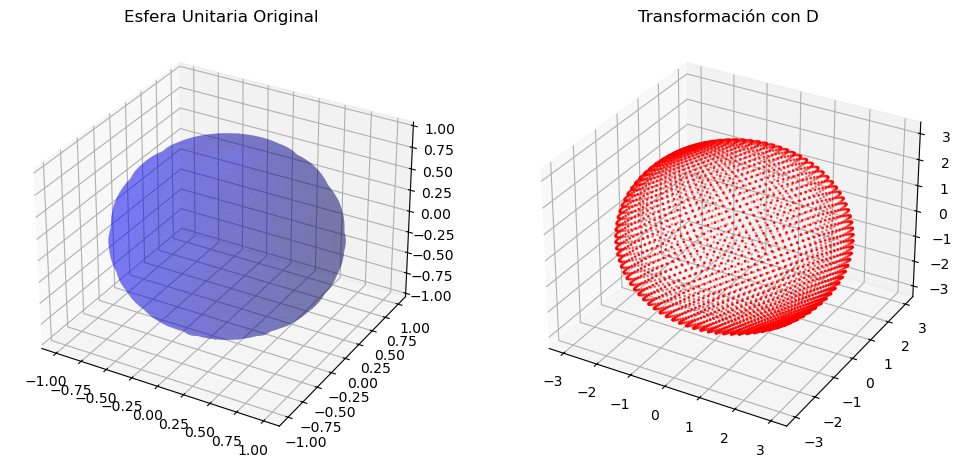

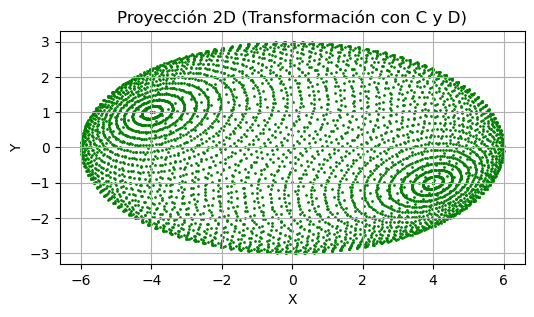

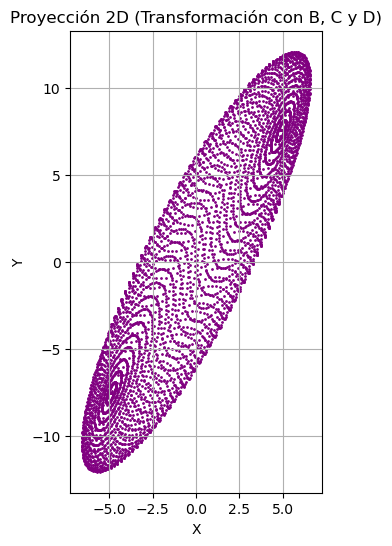

In [39]:

# Paso 1: Generar puntos en la esfera unitaria en 3D
num_points = 100
theta = np.linspace(0, np.pi, num_points // 2)  # Ángulo polar
phi = np.linspace(0, 2 * np.pi, num_points)     # Ángulo azimutal

# Crear la malla de puntos
theta, phi = np.meshgrid(theta, phi)
x_sphere = np.sin(theta) * np.cos(phi)
y_sphere = np.sin(theta) * np.sin(phi)
z_sphere = np.cos(theta)

# Apilar los puntos de la esfera en un arreglo 3D
points_sphere = np.vstack((x_sphere.flatten(), y_sphere.flatten(), z_sphere.flatten()))

# Paso 2:Aplicar la transformación sucesivas
points_transformed_D = np.dot(D, points_sphere)  # Dx
points_transformed_C = np.dot(C,points_transformed_D) #C(Dx)
points_transformed_B = np.dot(B,points_transformed_C) #B(CDx)

# Paso 3: Graficar los resultados
# Graficar en 3D - Esfera Unitaria Original
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.3, rstride=5, cstride=5)
ax.set_title("Esfera Unitaria Original")

# Graficar en 3D - Transformación con D
ax2 = fig.add_subplot(122, projection='3d')
x_transformed = points_transformed_D[0, :]
y_transformed = points_transformed_D[1, :]
z_transformed = points_transformed_D[2, :]
ax2.scatter(x_transformed, y_transformed, z_transformed, color='r', s=1)
ax2.set_title("Transformación con D")
plt.show()

# Graficar proyección 2D - Transformación con C
fig, ax3 = plt.subplots(figsize=(6, 6))
ax3.scatter(points_transformed_C[0, :], points_transformed_C[1, :], color='g', s=1)
ax3.set_aspect('equal')
ax3.set_title("Proyección 2D (Transformación con C y D)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# Proyección 2D con B aplicada después de C (aplicar B a los puntos transformados con C)

# Graficar proyección 2D después de B y C
fig, ax4 = plt.subplots(figsize=(6, 6))
ax4.scatter(points_transformed_B[0, :], points_transformed_B[1, :], color='purple', s=1)
ax4.set_aspect('equal')
ax4.set_title("Proyección 2D (Transformación con B, C y D)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


## Ejercicio 18

Hallar, si existe, una matriz A con coeficientes reales y del tamaño adecuado para que:
1) Los valores singulares no nulos de A sean {$\frac{3}{2}, 3$},

2) $A\begin{pmatrix} 1 \\ -2 \\ 2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$   

3) $\begin{pmatrix} 2 && 2 && 1 \end{pmatrix}A=\begin{pmatrix} 0 && 0 && 0 \end{pmatrix}$

Para que 2) y 3) sean posible, A debe ser de $3 \times 3$. Además:

1) $\implies rango(A) = 2 \implies A$ es singular. 
2) $\implies \langle \begin{pmatrix} 1 \\ -2 \\ 2 \end{pmatrix} \rangle = Nu(A)$
3) $\implies \langle \begin{pmatrix} 2 \\ 2 \\ 1 \end{pmatrix} \rangle = Nu(A^t) \ \ $ (pues $ \ \ v^tA = 0^t \implies (v^tA)^t = A^tv=0)$ 

Considero la DVS de $A$:

$ A = U \cdot \Sigma \cdot V^t $

$\langle \begin{pmatrix} 2 \\ 2 \\ 1 \end{pmatrix} \rangle = Nu(A^t) \implies AA^t \begin{pmatrix} 2 \\ 2 \\ 1 \end{pmatrix} = 0 \implies \begin{pmatrix} 2 \\ 2 \\ 1 \end{pmatrix} $ es autovector de autovalor $0$ de $AA^t$.

Como las columnas de $U$ son una base ortonormal de autovectores de $AA^t$, tenemos $u_3 = \frac{1}{3}\begin{pmatrix} 2 \\ 2 \\ 1 \end{pmatrix}$.   

$\langle \begin{pmatrix} 1 \\ -2 \\ 2 \end{pmatrix} \rangle = Nu(A) \implies A^tA \begin{pmatrix} 1 \\ -2 \\ 2 \end{pmatrix} = 0 \implies \begin{pmatrix} 1 \\ -2 \\ 2 \end{pmatrix} $ es autovector de autovalor $0$ de $A^tA$.

Como las columnas de $V$ son una base ortonormal de autovectores de $A^tA$, tenemos $v_3 = \frac{1}{3}\begin{pmatrix} 1 \\ -2 \\ 2 \end{pmatrix}$.   


Ahora propongo $v_1, u_1$ usando que $\begin{pmatrix} 1 \\ -2 \\ 2 \end{pmatrix} \perp \begin{pmatrix} 2 \\ 2 \\ 1 \end{pmatrix} $ y son linealmente independientes.

Tomo $v_1 = \frac{1}{3}\begin{pmatrix} 2 \\ 2 \\ 1 \end{pmatrix}$

Tomo $u_1 = \frac{1}{3}\begin{pmatrix} 1 \\ -2 \\ 2 \end{pmatrix}$

Ahora propongo $v_2 = \frac{1}{3}\begin{pmatrix} -2 \\ 1 \\ 2 \end{pmatrix} = u_2$

Finalmente, calculamos A y vemos que satisface lo pedido.

In [42]:
v_1 = Matrix([[Rational(2,3)], [Rational(2,3)], [Rational(1,3)]])
v_2 = Matrix([[Rational(-2,3)], [Rational(1,3)], [Rational(2,3)]])
v_3 = Matrix([[Rational(1,3)], [Rational(-2,3)], [Rational(2,3)]])

V = v_1.row_join(v_2).row_join(v_3)
U = v_3.row_join(v_2).row_join(v_1)
S = sp.diag(3, Rational(3,2), 0)

A = U@S@V.T 


display(A.singular_values()) # A satisface 1)
display(A@v_3) # A satisface 2)
display(v_1.T@A) # A satisface 3)

[3, 3/2, 0]

Matrix([
[0],
[0],
[0]])

Matrix([[0, 0, 0]])

# Compresión de imagenes

## Ejercicio 19

[[0.58056863 0.58056863 0.58056863 ... 0.58056863 0.58056863 0.58056863]
 [0.58056863 0.58056863 0.58056863 ... 0.58056863 0.58056863 0.58056863]
 [0.58056863 0.58056863 0.58056863 ... 0.58056863 0.58056863 0.58056863]
 ...
 [0.16412549 0.16412549 0.16412549 ... 0.16412549 0.16412549 0.16412549]
 [0.16412549 0.16412549 0.16412549 ... 0.16412549 0.16412549 0.16412549]
 [0.16412549 0.16412549 0.16412549 ... 0.16412549 0.16412549 0.16412549]]


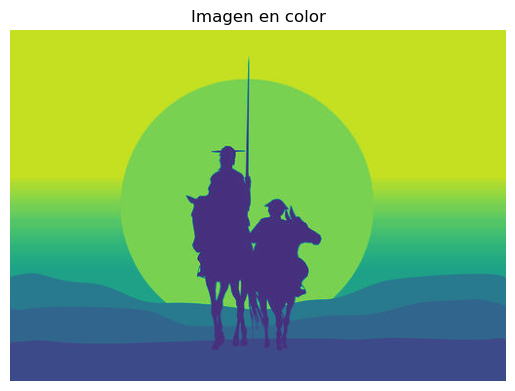

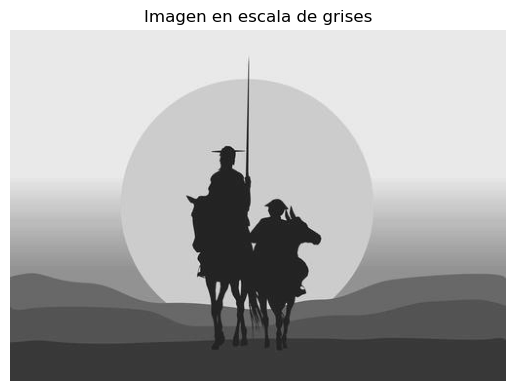

In [45]:
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.color import rgb2gray

#Cargar la imagen y mostrar la matriz de valores
imagen = plt.imread("quijote.jpg")
imagen = rgb2gray(imagen)
print(imagen)

#Mostrar la imagen con el mapa de colores por defecto
plt.imshow(imagen)
plt.title("Imagen en color")
plt.axis("off")  # Oculta los ejes
plt.show()

#Mostrar la imagen con el mapa de colores en blanco y negro
plt.imshow(imagen, cmap="gray")
plt.title("Imagen en escala de grises")
plt.axis("off")  
plt.show()


## Ejercicio 20

In [47]:
def dvs_recortada(A, r):
    """
    Recibe: -una matriz A en R^nxm
            -un entero positivo r

    Retorna:-tupla con la dimensión de A (n,m)
            -U_r matriz en R^nxr, V_r matriz en R^mxr  que surgen de eliminar las vectores singulares con indice mayor a r
            de U y V respectivamente. Con A=USV^t la dvs de A.
            -s_r vector de los primeros r valores singulares.
    """
    n, m = A.shape 
    U, s, Vt = np.linalg.svd(A)
    U_r = U[:, :r]
    Vt_r = Vt[:r, :]
    s_r = s[:r]
    return (n,m), U_r, Vt_r.T, s_r



## Ejercicio 21

In [49]:
def reconstruirMatriz(dim, U_r, V_r, s_r):
    """
    Recibe: -(n,m) tamaño de la matriz a reconstruir.
            -V_r matriz en R^mxr
            -U_r matriz en R^nxr
            -s_r vector en R^r
    
    Retorna:- B matriz en R^nxr mejor aproximación de A=USV^t
    """
    n, m = dim
    r = U_r.shape[1]
    U_b = np.zeros((n,n))
    V_b = np.zeros((m,m))
    S_b = np.zeros((n,m))
    np.fill_diagonal(S_b, s_r)
    U_b[:, :r] = U_r
    V_b[:, :r] = V_r
    
    B = U_b @S_b @V_b.T

    return B


NameError: name 'U_r' is not defined

## Ejercicio 22

In [ ]:
A = imagen
(n,m), U_r, V_r, s_r = dvs_recortada(A,100)
B = reconstruirMatriz((n,m), U_r, V_r, s_r)

plt.imshow(B, cmap="gray")
plt.title("Imagen en escala de grises")
plt.axis("off")  
plt.show()


In [ ]:
valores_singulares = scipy.linalg.svdvals(A)
paso = len(valores_singulares)//10 #calculo el paso para obtener 10 valores para r, equidistantes
valores_r = range(0, len(valores_singulares), paso)
calidades = []
proporciones = []
for r in valores_r:
    # Calidad de aproximación 
    calidad = valores_singulares[r+1] / valores_singulares[0]
    # Proporción de compresión 
    proporcion = m*n /((m+n)*r+r+2) 

    calidades.append(calidad)
    proporciones.append(proporcion)

# Graficar las proporciones y calidades
fig, ax1 = plt.subplots()

# Eje para las calidades
ax1.set_xlabel('r')
ax1.set_ylabel('error de la aproximación', color='tab:blue')
ax1.plot(valores_r, calidades, color='tab:blue', label='Calidad')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Crear un segundo eje para las proporciones
ax2 = ax1.twinx()  
ax2.set_ylabel('Proporción de compresión', color='tab:red')  
ax2.plot(valores_r, proporciones, color='tab:red', label='Proporción')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Mostrar el gráfico
fig.tight_layout()  
plt.title("Proporciones y Calidades para diferentes r")
plt.show()

## Ejercicio 23

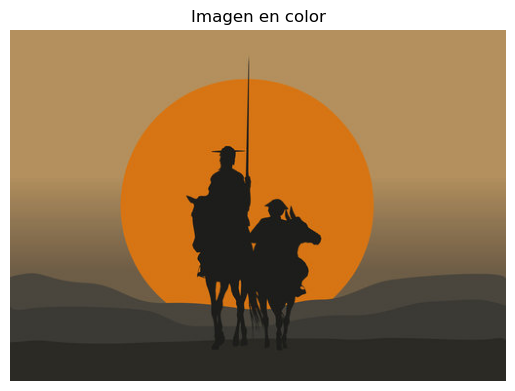

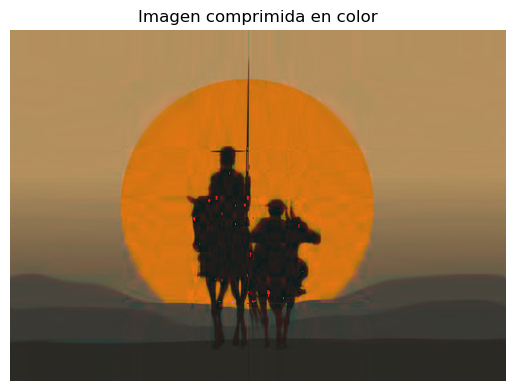

In [96]:
imagen = plt.imread("quijote.jpg")
canalesRGB = [imagen[:,:,0],imagen[:,:,1], imagen[:,:,2]] 

def comprimirCanal(canal, r):
    (n,m), U_r, V_r, s_r = dvs_recortada(canal,r)
    B = reconstruirMatriz((n,m), U_r, V_r, s_r)
    return B

c1 = comprimirCanal(canalesRGB[0], 12)
c2 = comprimirCanal(canalesRGB[1], 50)
c3 = comprimirCanal(canalesRGB[2], 120)

#reensamblo canalesRGB comprimido
compressed_img = imagen.copy() 
compressed_img[:,:,0]= c1
compressed_img[:,:,1]= c2
compressed_img[:,:,2]= c3

plt.imshow(imagen)
plt.title("Imagen en color")
plt.axis("off")  # Oculta los ejes
plt.show()

plt.imshow(compressed_img)
plt.title("Imagen comprimida en color")
plt.axis("off")  # Oculta los ejes
plt.show()
